# Week-2
In this week we'll learn Image Augumation.

In [1]:
# Importing some vital modules.
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

In [5]:
# In this model i'll be using 5 convolotuion layers.
model = Sequential([
    # Convolution neurons are 16 with kernel size(3x3) and input_shape.
    Conv2D(16, (3,3), activation='relu', input_shape=(400, 400, 3)),
    MaxPooling2D(2,2), # mentioning pooling size as 2x2.
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # Flatten will take the multi-dimensional array and converts into
    # single-dimensions.
    Flatten(),
    Dense(512, activation='relu'), # Dense layer with 512 neurons.
    Dense(1, activation='sigmoid')

])

In [6]:
# time to compile the model.
model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy',
                               metrics=['accuracy'])

In [12]:
# Augumenting the images.
train_datagen = ImageDataGenerator(rescale=1./255, # rescaling the image.
                                   rotation_range=40, # rotating the image.
                                   width_shift_range=0.2,  # shifting the width range.
                                   height_shift_range=0.2, # shifting the height range.
                                    
                                   shear_range =0.2,  # it will compress the image
                                   zoom_range=0.2, # zoom in by 20%
                                   horizontal_flip=True, # flipping the image.
                                   fill_mode='nearest') # if the pixels are empty, it will
                                                    # take the nearest pixel values.
validation_datagen = ImageDataGenerator(rescale=1/255)

# get the images in batch of 128 using train_datagen generator.
training_path = 'F:/basic_python/Coursera/dataset/train_images'
validation_path = 'F:/basic_python/Coursera/dataset/test_images'
train_generator = train_datagen.flow_from_directory(training_path, # file path
                                                   # resizing the images.
                                                    target_size=(400, 400),
                                                    batch_size = 100,
                                                    class_mode = 'binary')

validation_generator = validation_datagen.flow_from_directory(validation_path,
                                                             target_size=(400, 400),
                                                             batch_size=10,
                                                             class_mode='binary')

Found 24818 images belonging to 2 classes.
Found 182 images belonging to 2 classes.


When you are using generator you have to  specify "steps_per_epoch". what it does(see below cell) it should cover 100 times the batch_size (per epoch should cover the batch_size of 20 for about 100 times(for training) and same intution applies for about 50 times (for validation)).

In [13]:
history = model.fit(train_generator, # training data
                   steps_per_epoch = 8, # steps
                   epochs=3,
                   verbose=1,
                   validation_data=validation_generator,
                   validation_steps=8)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 8 steps, validate for 8 steps
Epoch 1/3
8/8 [==============================] - 372s 47s/step - loss: 0.6954 - accuracy: 0.4925 - val_loss: 0.6807 - val_accuracy: 0.5375
Epoch 2/3
7/8 [=========================>....] - ETA: 1:26 - loss: 0.6909 - accuracy: 0.5129

D:\New folder\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
D:\New folder\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
D:\New folder\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
D:\New folder\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
D:\New folder\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 131072 bytes but only got 0.

8/8 [==============================] - 699s 87s/step - loss: 0.6899 - accuracy: 0.5150 - val_loss: 0.6770 - val_accuracy: 0.6500
Epoch 3/3
8/8 [==============================] - 498s 62s/step - loss: 0.6874 - accuracy: 0.5675 - val_loss: 0.6856 - val_accuracy: 0.5000


### Visualizing the plot.

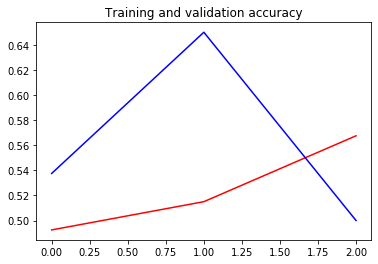

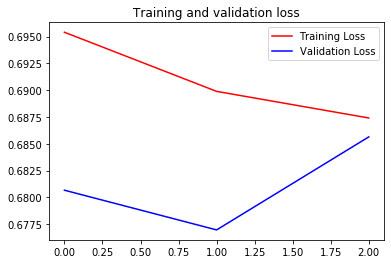

In [14]:
acc = history.history['accuracy'] # # getting the accuracy from history object.
val_acc = history.history['val_accuracy']  # getting the val_accuracy from history object.
loss = history.history['loss'] # getting the loss from history object.
val_loss = history.history['val_loss'] # getting the val_loss from history object.

epochs = range(len(acc)) # length of the acc will be the no of epochs.

plt.plot(epochs, acc, 'r', label='Training accuracy') # x-axis= no of epochs, y-axis=acc
                            # mentioning colour as red and label as "Training accuracy".
plt.plot(epochs, val_acc, 'b', label='Validation accuracy') # x-axis= no of epochs, y-axis=acc
                            # mentioning colour as red and label as "Validation accuracy".

# title of the plot will be "Training and validation accuracy".
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend() # for visualzing the labels.

plt.show() # show the plot.

Still we have to improvise.

I trained it only for 3 epochs 'cause I wasn't having GPU and it took me 15 mins for per epoch.